In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [9]:
media_dt = pd.read_csv("/app/media_dataset.csv")

In [15]:
media_dt.columns

Index(['Time', 'sales', 'FB', 'TV', 'Radio', 'Date'], dtype='object')

Spend per channel per week

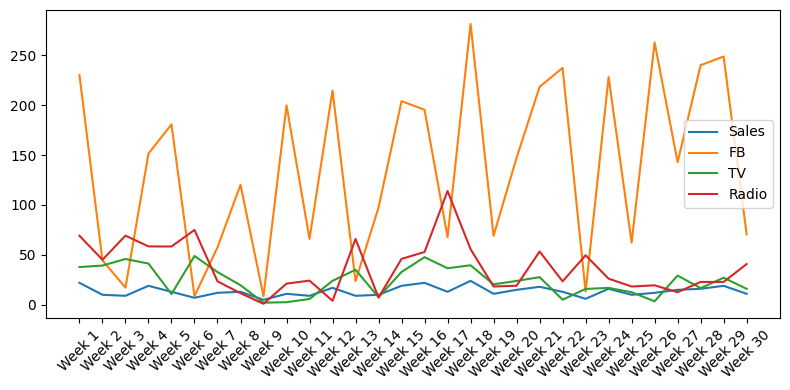

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(media_dt["Time"], media_dt["sales"], label="Sales")
plt.plot(media_dt["Time"], media_dt["FB"], label="FB")
plt.plot(media_dt["Time"], media_dt["TV"], label="TV")
plt.plot(media_dt["Time"], media_dt["Radio"], label="Radio")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
media_dt["FB"].corr(media_dt["sales"])

np.float64(0.7980488795955992)

In [63]:
def plot_polynomial_function(ind_var, dep_var, degree=1):
    coefficients = np.polyfit(ind_var, dep_var, degree)

    polynomial = np.poly1d(coefficients)

    x_values = np.linspace(min(ind_var), max(ind_var), 100)
    y_values = polynomial(x_values)

    y_pred = polynomial(ind_var)

    r_squared = r2_score(dep_var, y_pred)

    plt.figure(figsize=(8, 4))
    plt.scatter(ind_var, dep_var, label="Data Points")
    plt.plot(x_values, y_values, color="red", label=f"Degree {degree} Regression Line")
    plt.xticks(rotation=45)
    plt.legend()

    plt.text(0.05, 0.95, f'$R^2 = {r_squared:.3f}$', transform=plt.gca().transAxes,
            fontsize=12, verticalalignment='top')

    plt.tight_layout()
    plt.show()

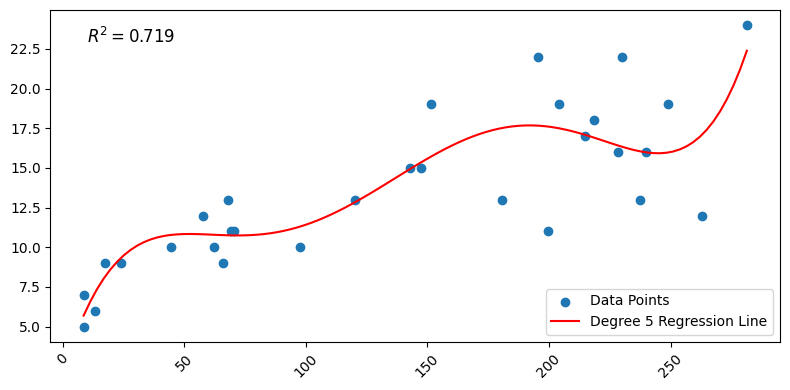

In [73]:

plot_polynomial_function(media_dt["FB"], media_dt["sales"], 5)

Basic adstock model:

$A_{t} = \beta A_{t-1} + S_{t}, \quad t = 1,...,n$

Explain

Diminishing returns:

$dim\_ret(t) = (\beta A_{t-1} + S_{t})^{\alpha}, \quad t = 1,...,n$

Both $\alpha$ and $\beta$ are positive numbers between 0 and 1 and $A_{0}=S_{0}$